<a href="https://colab.research.google.com/github/jeevanvishwa02/Data_Science/blob/main/Fraud_Transaction_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Company - OKCoin

Desc
https://drive.google.com/file/d/1aQz8cuNryfeIaMv12jB41u6uZq8D-osw/view?usp=share_link

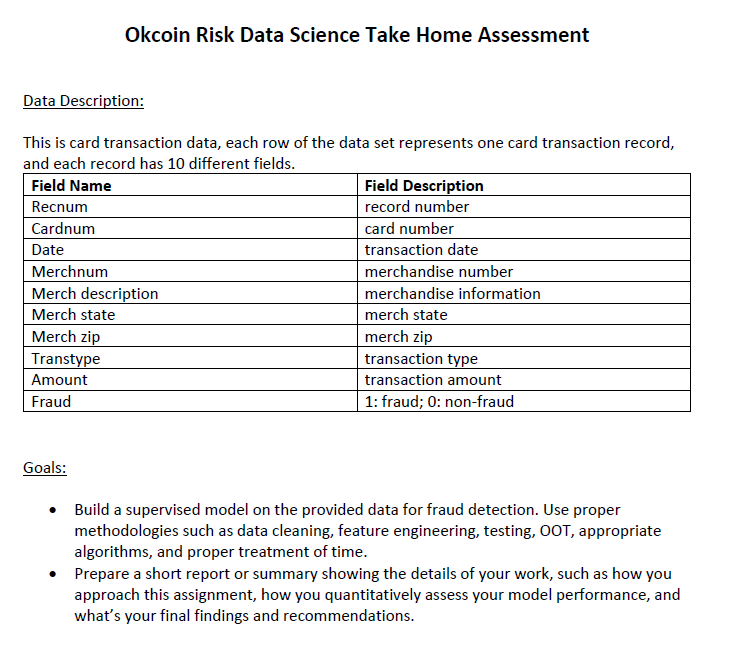

## Import the Packages and data

In [1]:
# import modules
import pandas as pd # for data analysis
import numpy as np # for numeric functions
import matplotlib.pyplot as plt # for plotting
import seaborn as sns

In [2]:
#https://drive.google.com/file/d/1Ad4vJyT0Kt4UkYQwu8daqeOKgJSC4XEt/view?usp=share_link

!gdown 1Ad4vJyT0Kt4UkYQwu8daqeOKgJSC4XEt


Downloading...
From: https://drive.google.com/uc?id=1Ad4vJyT0Kt4UkYQwu8daqeOKgJSC4XEt
To: /content/okc_take_home_data.csv
100% 7.60M/7.60M [00:00<00:00, 39.1MB/s]


In [3]:
df=pd.read_csv('okc_take_home_data.csv')

In [4]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/2020,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/2020,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/2020,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/2020,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/2020,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [5]:
df.shape

(96753, 10)

In [6]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           93378 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95558 non-null  object 
 6   Merch zip          92097 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.4+ MB


## Basic Data Summary

In [8]:
#create counts of df for plotting categorical variables using Numpy
fraud_class = np.unique(df['Fraud'], return_counts=True)
print('target_class = {}\n'.format(fraud_class))

target_class = (array([0, 1]), array([95694,  1059]))



In [9]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color': 'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

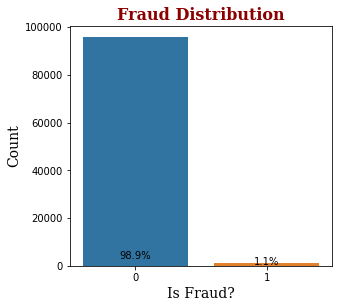

In [10]:
# Display a frequency distribution for target_class
fig = plt.figure(figsize=[16,15]); # Define figure size and store it in a variable
ax1 = fig.add_subplot(3, 3, 2);    #Use subplot function to create a plot of the size defined
sns.barplot(x=list(fraud_class[0]), y=list(fraud_class[1]), ax=ax1 ); # Add x labels for bar plot from array defined above. Similarly for y-axis. ax defines which plot the bar should return to
ax1.text(0, 2800, '{}%' .format(str(round(fraud_class[1][0]/sum(fraud_class[1])*100,1))),  horizontalalignment='center') # Add the text and define where it has to be added (0,2800 defines x and y positions for the text)
ax1.text(1, 500, '{}%' .format(str(round(fraud_class[1][1]/sum(fraud_class[1])*100,1))),  horizontalalignment='center')  # Add the text
ax1.set_title('Fraud Distribution', fontdict=axtitle_dict); # Set the title
ax1.set_xlabel('Is Fraud?', fontdict=axlab_dict);  # Set the xlabel
ax1.set_ylabel('Count', fontdict=axlab_dict);         # Set the ylabel
#ax1.bar_label(ax1.containers[0])
plt.show()

## Data Cleaning

### NULL Value Treatment

In [11]:
#Check for NULL in each column
cnt=0
for i in df.columns:
  if(df[i].isnull().sum().sum()>0):
    print("Column",i,df[i].isnull().sum().sum())
    cnt=cnt+1
print("Number of columns with nulls",cnt)


Column Merchnum 3375
Column Merch state 1195
Column Merch zip 4656
Number of columns with nulls 3


In [12]:
df.isnull().sum()/len(df)

Recnum               0.000000
Cardnum              0.000000
Date                 0.000000
Merchnum             0.034883
Merch description    0.000000
Merch state          0.012351
Merch zip            0.048123
Transtype            0.000000
Amount               0.000000
Fraud                0.000000
dtype: float64

In [173]:
df['Amount'].mean()

395.8241855032919

In [174]:
df[df['Fraud']==1]['Amount'].mean()

2103.352417374882

**NULL Value treatment for Scalar Variables**

1.   Remove the columns which have NULLS poct more than 20% for scalar variables
2.   For others, replace the NULLS with median




In [13]:
#check nulls for predicted column
a=df['Fraud'].isnull().sum()
print("There are", a ,"NULLs in the target variable")

There are 0 NULLs in the target variable


In [14]:
#Step 1 - Remove the columns with more than 20% NULLs

for i in df.describe().columns:
  if(df[i].isnull().sum()/len(df)>0.2):
    df.drop(columns=i,axis=1,inplace=True)

In [15]:
# Check for NULLs again
# All these columsn should be categorical variables 
cnt=0
null_catg_cols=[]
for i in df.columns:
  if(df[i].isnull().sum().sum()>0):
    print("Column",i,df[i].isnull().sum().sum())
    null_catg_cols.append(i)
    cnt=cnt+1
print("Number of columns with nulls",cnt)
null_catg_cols

Column Merchnum 3375
Column Merch state 1195
Column Merch zip 4656
Number of columns with nulls 3


['Merchnum', 'Merch state', 'Merch zip']

In [16]:
df[df['Merchnum'].isnull()==True].head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
97,98,5142167414,1/3/2020,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,89.00,0
115,116,5142182128,1/3/2020,NaN,GRAINGER #973,IL,60089.0,P,327.34,0
135,136,5142126842,1/3/2020,NaN,AUTOMATED OFFICE PRODU,MD,20706.0,P,2110.00,0
163,164,5142127276,1/3/2020,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,4444.00,0
168,169,5142132574,1/3/2020,NaN,ROLL CALL NEWSPAPER,DC,20001.0,P,104.69,0


In [17]:
df[df['Merch description']=='CONVENIENCE CHECK FEE(%)'].head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
97,98,5142167414,1/3/2020,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,89.0,0
163,164,5142127276,1/3/2020,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,4444.0,0
553,554,5142249540,1/5/2020,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,23.0,0
1682,1683,5142268992,1/10/2020,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,380.0,0
3825,3826,5142249540,1/18/2020,NaN,CONVENIENCE CHECK FEE(%),NaN,NaN,D,14.0,0


**NULL Value treatment for Variables**

1.   Remove the columns with either Unknown or OTH to not drop any releveant information
2.   Zipcode and Merchnum are replaced with 99999

In addition, NULLs are less than 5% of the data. We could remove them but I wanted to check how these rest of the rows are behaving in the data




In [18]:
df['Merch state'].fillna('Unknown',inplace=True)
df['Merch zip'].fillna(99999,inplace=True)
df['Merchnum'].fillna(99999,inplace=True)

In [19]:
# Check for NULLs again
# No columns should have NULLs
cnt=0
for i in df.columns:
  if(df[i].isnull().sum().sum()>0):
    print("Column",i,df[i].isnull().sum().sum())
    #null_catg_cols.append(i)
    cnt=cnt+1
print("Number of columns with nulls",cnt)


Number of columns with nulls 0


### Outliers Treatment

In [20]:
#Check for outliers based on standard defintion of 25% and 75% quantiles
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1

((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any()

<ipython-input-20-bfbdf404aee9>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any()


Amount                True
Cardnum               True
Date                 False
Fraud                 True
Merch description    False
Merch state          False
Merch zip            False
Merchnum             False
Recnum               False
Transtype            False
dtype: bool

Cardnum is an identifier. According to standard outlier definition, columns amount and Fraud column has outliers.

But due to imbalancing, definition is showing Fraud column has outliers. It can be discarded

In [21]:
#Upper and Lower limits using standard definition. This will be used to replace the outlier values if necessary (Based on team's discussion)
dict={}
cols=['Amount']
for col in cols:
  percentile75=df[col].quantile(0.75)
  percentile25=df[col].quantile(0.25)
  IQR=percentile75-percentile25
  upper_limit=percentile75+1.5*IQR
  lower_limit=percentile25-1.5*IQR
  dict['upper_limit'+'_'+col]=upper_limit
  dict['lower_limit'+'_'+col]=lower_limit

In [22]:
#dict
lst=[]
lower_limit=[]
upper_limit=[]
max=[]
min=[]
lqo=[]
uqo=[]
median=[]
mean=[]
for i in cols:
  lqo_value=len(df[(df[i]<dict['lower_limit_'+i])])
  uqo_value=len(df[(df[i]>dict['upper_limit_'+i])])
  lst.append(i)
  lqo.append(lqo_value)
  uqo.append(uqo_value)
  lower_limit.append(dict['lower_limit_'+i])
  upper_limit.append(dict['upper_limit_'+i])
  min.append(df[i].min())
  max.append(df[i].max())
  mean.append(df[i].mean())
  median.append(df[i].median())
outlier_df=pd.DataFrame()
outlier_df['lst']=lst
outlier_df['lqo']=lqo
outlier_df['uqo']=uqo
outlier_df['lower_limit']=lower_limit
outlier_df['upper_limit']=upper_limit
outlier_df['min']=min
outlier_df['max']=max
outlier_df['mean']=mean
outlier_df['median']=median

In [23]:
outlier_df

,lst,lqo,uqo,lower_limit,upper_limit,min,max,mean,median
0,Amount,0,10330,-558.6,1020.28,0.01,3102045.53,427.885677,137.98


In [24]:
print("Number of outliers in amount columns ",outlier_df['uqo']/len(df))

Number of outliers in amount columns  0    0.106767
Name: uqo, dtype: float64


In [25]:
df[df['Amount']>5000]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
311,312,5142189945,1/4/2020,8834000695412,BUY.COM,CA,92656.0,P,5112.19,0
1103,1104,5142189945,1/6/2020,2036100687150,"GE REUTER-STOKES, INC",OH,44087.0,P,26910.00,0
1911,1912,5142189945,1/11/2020,6822409951031,FLUKE CORPORATION,WA,98203.0,P,6753.00,0
2784,2785,5142189945,1/13/2020,5076000640906,DANKA OI - CIC,FL,33716.0,P,11086.00,0
3995,3996,5142189945,1/19/2020,316463110,AMERICAN RADIOLABELED,MO,63146.0,P,10060.00,0
...,...,...,...,...,...,...,...,...,...,...
95334,95335,5142121593,12/22/2020,4591200815555,DELL MARKETING L.P.,TX,78682.0,P,6296.00,0
95539,95540,5142121593,12/22/2020,4591200815555,DELL MARKETING L.P.,TX,78682.0,P,6296.00,0
96037,96038,5142189945,12/28/2020,2036100687150,"GE REUTER-STOKES, INC",OH,44087.0,P,24845.00,0
96197,96198,5142189945,12/28/2020,2036100687150,"GE REUTER-STOKES, INC",OH,44087.0,P,24845.00,0


There are 314 outliers with more than $5000 worth transactions. Based on Merchant description, these seems valid

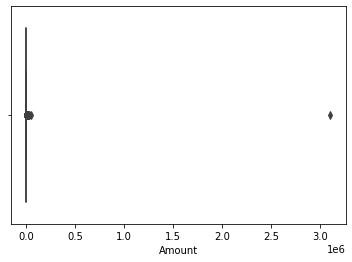

In [26]:
sns.boxplot(data=df,x='Amount')

Based on observations, There is one outlier which is highly impacting the data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           96753 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        96753 non-null  object 
 6   Merch zip          96753 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.4+ MB


In [28]:
df[df['Amount']>30000]

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
47339,47340,5142275225,6/22/2020,99999,INTERSOL,Unknown,99999.0,P,47900.00,0
52714,52715,5142189135,7/13/2020,99999,INTERMEXICO,Unknown,99999.0,P,3102045.53,0
59516,59517,5142138135,8/3/2020,900009045549,KRACKELER SCIENTIFIC,NY,12202.0,P,30372.46,1


In [29]:
#Above outlier is replaced to upper limit as there is not much informaiton from Merchant related columns and $3.1 Mn is a huge transaction

df['Amount']=np.where(df['Amount']==3102045.53,df['Amount']==1020.28,df['Amount'])

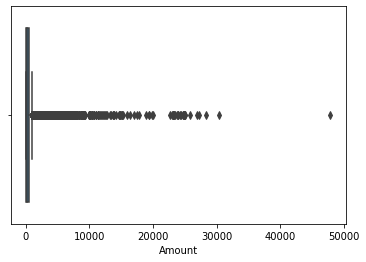

In [30]:
sns.boxplot(data=df,x='Amount')

## Feature Engineering

### Transformation

In [31]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

In [32]:
df.columns=['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch_description',
       'Merch_state', 'Merch_zip', 'Transtype', 'Amount', 'Fraud']

Merch Description

In [33]:
df['Merch_description'].value_counts()

GSA-FSS-ADV                 1688
SIGMA-ALDRICH               1635
STAPLES #941                1174
FISHER SCI ATL              1093
MWI*MICRO WAREHOUSE          958
                            ... 
HBD INC                        1
SALES MARKETING MAGAZINE       1
PATTERSON'S TRUE VALUE         1
FLOPPY COPY                    1
BEST BUY      00001610         1
Name: Merch_description, Length: 13126, dtype: int64

In [34]:
#@title
#Grouping Merchants

Pro_list = df['Merch_description'].value_counts()

Pro_Percent = Pro_list.to_frame() #Converting the series to data frame
# Pro_Percent = pd.DataFrame({'Product':Pro_Percent.index, 'Percent':Pro_Percent.values})
Merchant_List = [] # getting the list of grouped merchants

for i in range(len(Pro_Percent)):  
  if Pro_Percent.Merch_description[i] > 4:
    Merchant_List.append(Pro_Percent.index[i]) 
  
#Adding a new column grouped merchants
df['Merch_groups'] = np.where(df['Merch_description'].isin(Merchant_List), df['Merch_description'], 'Others')

In [35]:
Pro_list.quantile([0.05,0.1,0.75,0.95])

0.05     1.0
0.10     1.0
0.75     4.0
0.95    25.0
Name: Merch_description, dtype: float64

In [36]:
df['Merch_groups'].value_counts()

Others                    16676
GSA-FSS-ADV                1688
SIGMA-ALDRICH              1635
STAPLES #941               1174
FISHER SCI ATL             1093
                          ...  
VARIAN VACUM PRODUCTS         5
AF MURPHY DIE AND MACH        5
JWOD. COM                     5
FEDERAL RESEARCH SERVI        5
TUM A LUM LUMBER  0007        5
Name: Merch_groups, Length: 2783, dtype: int64

Merch State

In [37]:
df['Merch_state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
495        1
376        1
458        1
546        1
116        1
Name: Merch_state, Length: 228, dtype: int64

In [38]:
#@title
#Grouping States

Pro_list = df['Merch_state'].value_counts()

Pro_Percent = Pro_list.to_frame() #Converting the series to data frame
Merchant_state = [] # getting the list of grouped state

for i in range(len(Pro_Percent)):  
  if Pro_Percent.Merch_state[i] > 4:
    Merchant_state.append(Pro_Percent.index[i]) 
  
#Adding a new column grouped merchants
df['Merch_state_groups'] = np.where(df['Merch_state'].isin(Merchant_state), df['Merch_state'], 'Others')

In [39]:
Pro_list.quantile([0.05,0.1,0.75,0.95])

0.05       1.00
0.10       1.00
0.75       4.25
0.95    3181.05
Name: Merch_state, dtype: float64

In [40]:
len(Merchant_state)

57

In [41]:
df['Merch_state_groups'].value_counts()

TN         12035
VA          7872
CA          6817
IL          6508
MD          5398
GA          5025
PA          4899
NJ          3912
TX          3790
NC          3322
WA          3300
DC          3208
OH          3131
NY          2430
MO          2420
FL          2143
MA          2081
MI          2033
CO          1987
OR          1510
KS          1236
Unknown     1195
WI           953
CT           952
UT           939
MN           939
NH           908
NV           726
KY           520
RI           467
OK           411
AZ           346
AL           345
NE           301
IN           265
MS           244
Others       188
WV           181
ID           176
LA           173
SD           166
AK           164
IA           163
SC           154
ON           137
ME           128
MT           123
NM           115
VT            85
DE            70
ND            43
AR            34
WY            27
BC            23
PQ            14
HI            11
NS             5
AB             5
Name: Merch_st

Date

In [42]:
from datetime import datetime
import datetime as dt

In [43]:
# Date Column

#Change the date column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

In [44]:
df['YY_Month']=df['Date'].dt.strftime('%Y-%m')
df['Month']=df['Date'].dt.strftime('%b')
df['Day']=df['Date'].dt.strftime('%d').astype(int)

df['week_day']=df['Date'].apply(lambda x:x.dayofweek)
conditions=[(df['week_day']==0),(df['week_day']==1),(df['week_day']==2),(df['week_day']==3),(df['week_day']==4),(df['week_day']==5),(df['week_day']==6)]
choices=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#datetime(df['Datetime']).dayofweek
df['weekday_name']=np.select(conditions,choices,default='NA')

In [45]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch_description,Merch_state,Merch_zip,Transtype,Amount,Fraud,Merch_groups,Merch_state_groups,YY_Month,Month,Day,week_day,weekday_name
0,1,5142190439,2020-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,FEDEX SHP 12/23/09 AB#,TN,2020-01,Jan,1,2,Wednesday
1,2,5142183973,2020-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Others,MA,2020-01,Jan,1,2,Wednesday
2,3,5142131721,2020-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,OFFICE DEPOT #191,MD,2020-01,Jan,1,2,Wednesday
3,4,5142148452,2020-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,FEDEX SHP 12/28/09 AB#,TN,2020-01,Jan,1,2,Wednesday
4,5,5142190439,2020-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,FEDEX SHP 12/23/09 AB#,TN,2020-01,Jan,1,2,Wednesday


In [46]:
df['YY_Month'].unique()

array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
      dtype=object)

In [47]:
df['Day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

### Data Exploration

In [ ]:
df2=df.copy()

In [ ]:
df2.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch_description',
       'Merch_state', 'Merch_zip', 'Amount', 'Fraud', 'Month',
       ...
       'YY_Month_2020-09', 'YY_Month_2020-10', 'YY_Month_2020-11',
       'YY_Month_2020-12', 'weekday_name_Monday', 'weekday_name_Saturday',
       'weekday_name_Sunday', 'weekday_name_Thursday', 'weekday_name_Tuesday',
       'weekday_name_Wednesday'],
      dtype='object', length=2871)

In [ ]:
df2.head(2)

,Recnum,Cardnum,Date,Merchnum,Merch_description,Merch_state,Merch_zip,Amount,Fraud,Month,...,YY_Month_2020-09,YY_Month_2020-10,YY_Month_2020-11,YY_Month_2020-12,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday
0,1,5142190439,2020-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,3.62,0,Jan,...,0,0,0,0,0,0,0,0,0,1
1,2,5142183973,2020-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,31.42,0,Jan,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
hyp=df2[df2['Fraud']==1].groupby(['Month'],as_index=False).count()
hyp2=df2.groupby(['Month'],as_index=False).count()
hyp2.head()
hyp3=pd.merge(hyp,hyp2,how='inner',on='Month')[['Month','Fraud_x','Fraud_y']]
hyp3['Fraud_rate']=hyp3['Fraud_x']/(hyp3['Fraud_x']+hyp3['Fraud_y'])

,Month,Fraud_x,Fraud_y,Fraud_rate
0,Apr,69,7731,0.008846
1,Aug,233,11050,0.020651
2,Dec,105,6653,0.015537
3,Feb,17,7756,0.002187
4,Jan,22,6810,0.003220


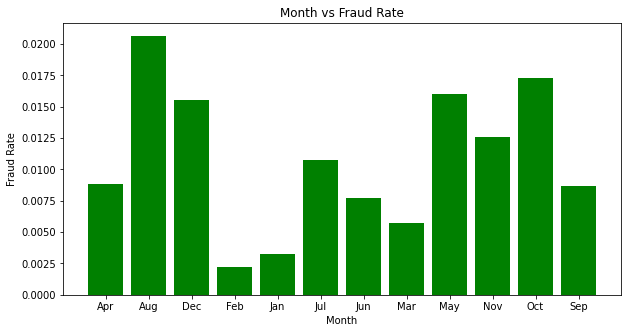

In [ ]:
hyp=df2[df2['Fraud']==1].groupby(['Month'],as_index=False).count()
hyp2=df2.groupby(['Month'],as_index=False).count()
hyp2.head()
hyp3=pd.merge(hyp,hyp2,how='inner',on='Month')[['Month','Fraud_x','Fraud_y']]
hyp3['Fraud_rate']=hyp3['Fraud_x']/(hyp3['Fraud_x']+hyp3['Fraud_y'])

x=hyp3['Month']
y=hyp3['Fraud_rate']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(10,5))
plt.bar(x_pos, y, color='green')
plt.xlabel("Month")
plt.ylabel("Fraud Rate")
plt.title("Month vs Fraud Rate")

plt.xticks(x_pos, x)
plt.show()

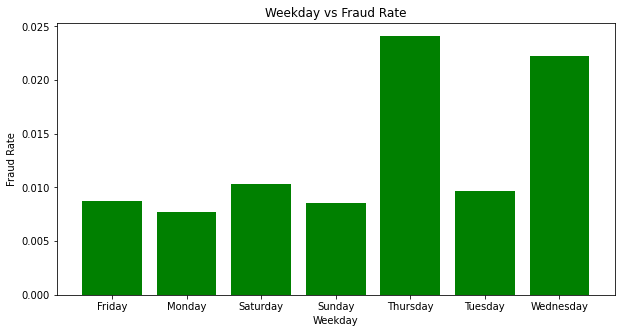

In [ ]:
hyp=df[df['Fraud']==1].groupby(['weekday_name'],as_index=False).count()
hyp2=df.groupby(['weekday_name'],as_index=False).count()
hyp2.head()
hyp3=pd.merge(hyp,hyp2,how='inner',on='weekday_name')[['weekday_name','Fraud_x','Fraud_y']]
hyp3['Fraud_rate']=hyp3['Fraud_x']/(hyp3['Fraud_x']+hyp3['Fraud_y'])

x=hyp3['weekday_name']
y=hyp3['Fraud_rate']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(10,5))
plt.bar(x_pos, y, color='green')
plt.xlabel("Weekday")
plt.ylabel("Fraud Rate")
plt.title("Weekday vs Fraud Rate")

plt.xticks(x_pos, x)
plt.show()

In [ ]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch_description',
       'Merch_state', 'Merch_zip', 'Transtype', 'Amount', 'Fraud',
       'Merch_groups', 'Merch_state_groups', 'YY_Month', 'Month', 'Day',
       'week_day', 'weekday_name'],
      dtype='object')

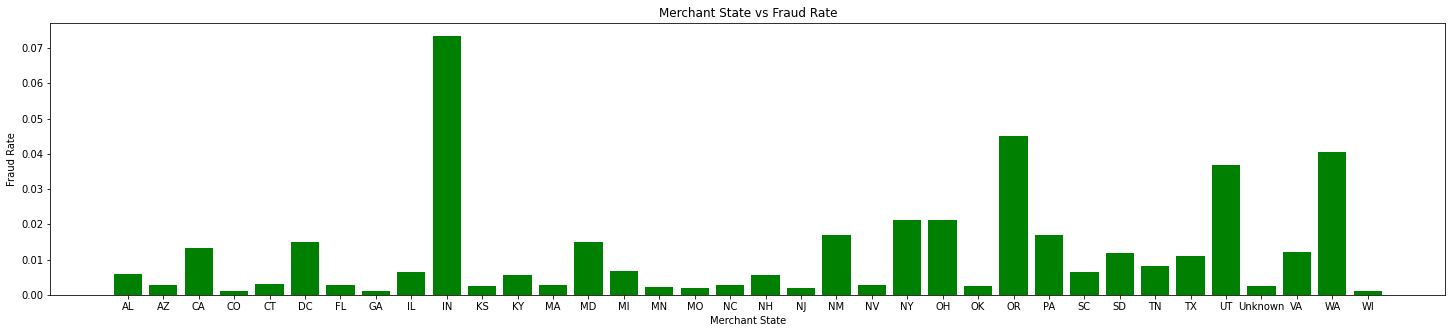

In [92]:
hyp=df[df['Fraud']==1].groupby(['Merch_state_groups'],as_index=False).count()
hyp2=df.groupby(['Merch_state_groups'],as_index=False).count()
hyp2.head()
hyp3=pd.merge(hyp,hyp2,how='inner',on='Merch_state_groups')[['Merch_state_groups','Fraud_x','Fraud_y']]
hyp3['Fraud_rate']=hyp3['Fraud_x']/(hyp3['Fraud_x']+hyp3['Fraud_y'])

x=hyp3['Merch_state_groups']
y=hyp3['Fraud_rate']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(25,5))
plt.bar(x_pos, y, color='green')
plt.xlabel("Merchant State")
plt.ylabel("Fraud Rate")
plt.title("Merchant State vs Fraud Rate")

plt.xticks(x_pos, x)
plt.show()

In [93]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch_description',
       'Merch_state', 'Merch_zip', 'Transtype', 'Amount', 'Fraud',
       'Merch_groups', 'Merch_state_groups', 'YY_Month', 'Month', 'Day',
       'week_day', 'weekday_name'],
      dtype='object')

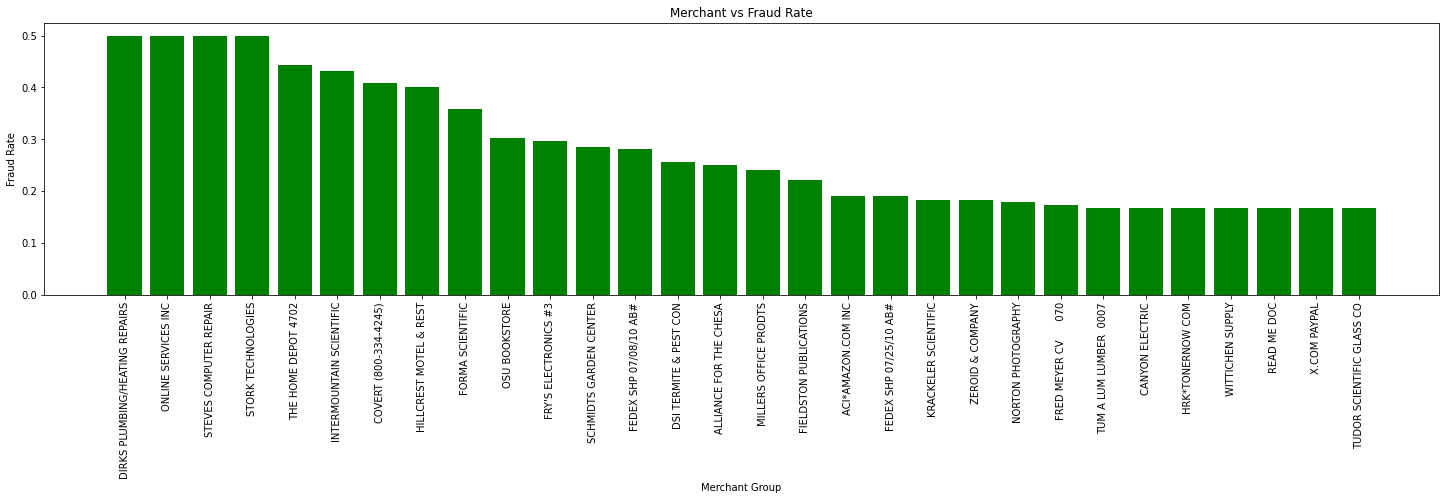

In [99]:
hyp=df[df['Fraud']==1].groupby(['Merch_groups'],as_index=False).count()
hyp2=df.groupby(['Merch_groups'],as_index=False).count()
hyp2.head()
hyp3=pd.merge(hyp,hyp2,how='inner',on='Merch_groups')[['Merch_groups','Fraud_x','Fraud_y']]
hyp3['Fraud_rate']=hyp3['Fraud_x']/(hyp3['Fraud_x']+hyp3['Fraud_y'])

hyp3=hyp3.sort_values(by=['Fraud_rate'],ascending=False)

x=hyp3['Merch_groups'][0:30]
y=hyp3['Fraud_rate'][0:30]
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(25,5))
plt.bar(x_pos, y, color='green')
plt.xticks(rotation = 90)
plt.xlabel("Merchant Group")
plt.ylabel("Fraud Rate")
plt.title("Merchant vs Fraud Rate")

plt.xticks(x_pos, x)
plt.show()

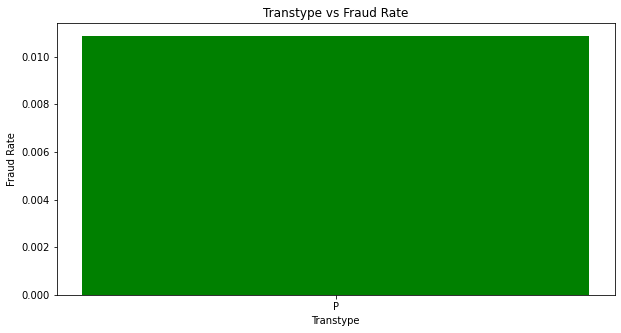

In [ ]:
hyp=df[df['Fraud']==1].groupby(['Transtype'],as_index=False).count()
hyp2=df.groupby(['Transtype'],as_index=False).count()
hyp2.head()
hyp3=pd.merge(hyp,hyp2,how='inner',on='Transtype')[['Transtype','Fraud_x','Fraud_y']]
hyp3['Fraud_rate']=hyp3['Fraud_x']/(hyp3['Fraud_x']+hyp3['Fraud_y'])

x=hyp3['Transtype']
y=hyp3['Fraud_rate']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(10,5))
plt.bar(x_pos, y, color='green')
plt.xlabel("Transtype")
plt.ylabel("Fraud Rate")
plt.title("Transtype vs Fraud Rate")

plt.xticks(x_pos, x)
plt.show()

In [172]:
df[df['Fraud']==0]['Transtype'].value_counts()

P    95339
A      181
D      173
Y        1
Name: Transtype, dtype: int64

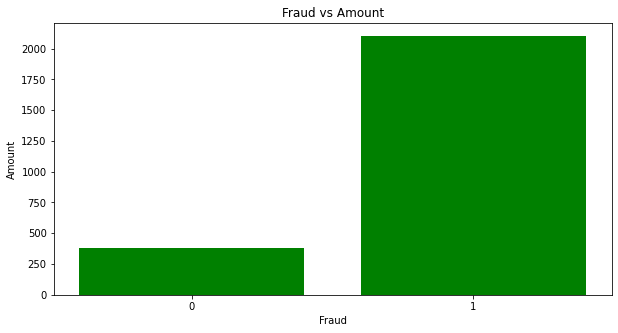

In [ ]:
hyp2=df.groupby(['Fraud'],as_index=False).mean()
hyp2.head()

x=hyp2['Fraud']
y=hyp2['Amount']
x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(10,5))
plt.bar(x_pos, y, color='green')
plt.xlabel("Fraud")
plt.ylabel("Amount")
plt.title("Fraud vs Amount")

plt.xticks(x_pos, x)
plt.show()

**Findings:**

1. All fraudulent transactions have higher spend - almost more than 500% more than non fraduelent related transactions
2. Only Transtype P have fraudulent related transactions
3. State Indiana, Orlando and Utah have the highest fraud rates compared to other states
4. Fraud rate is higher during work week particularly during Wednesday and Thursdays
5. 13% of merchants(#30) have fraud rate more than 20%

### Variable importance 

As there are lot of variables, it is better to filter the important variables using XG Boost or Decision Tree and then explore further 


**Undersampling**

In [49]:
df2['Fraud'].value_counts()/len(df2)

0    0.989055
1    0.010945
Name: Fraud, dtype: float64

In [50]:
df2.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch_description',
       'Merch_state', 'Merch_zip', 'Transtype', 'Amount', 'Fraud',
       'Merch_groups', 'Merch_state_groups', 'YY_Month', 'Month', 'Day',
       'week_day', 'weekday_name'],
      dtype='object')

**One Hot Encoding**

In [51]:
catg_columns=['Merch_groups', 'Merch_state_groups', 'Transtype','YY_Month','weekday_name']
df2 = pd.get_dummies(df, columns=catg_columns, drop_first=True)
df2.head()

y=df2['Fraud']
X=df2.drop(columns=['Fraud','Merch_description','Merch_state','Recnum', 'Cardnum','Date','Day','Month','week_day','Merch_zip','Merchnum'])


Under sample the dataset and calculate the variable importance

In [52]:
# Undersampling and under sampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [53]:
# Randomly over sample the minority class
ros = RandomUnderSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X, y)
# Check the number of records after over sampling
print(sorted(Counter(y).items()))
print(sorted(Counter(y_train_ros).items()))

[(0, 95694), (1, 1059)]
[(0, 1059), (1, 1059)]


**XG Boost**

In [54]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot


In [55]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train_ros, y_train_ros)
# feature importance
print(model.feature_importances_)


[0.05384174 0.         0.         ... 0.00073688 0.         0.00316853]


In [56]:
# plot

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

cols=np.array(X.columns)[sorted_idx]
df_features=pd.DataFrame()

df_features['sorted_idx']=sorted_idx
df_features['cols']=cols
df_features['score']=feature_importance[sorted_idx]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


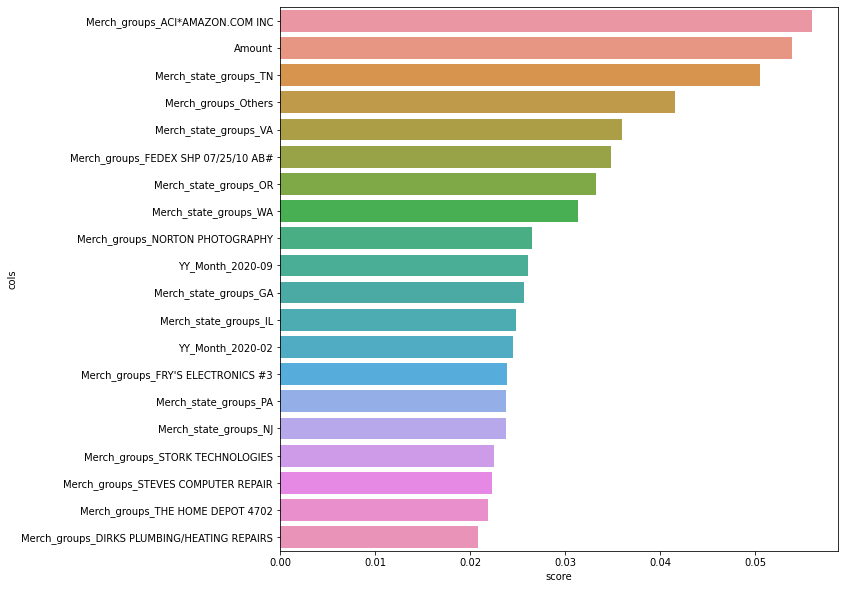

In [57]:
fig = plt.figure(figsize=[10,10])
df_imp_fea=df_features.sort_values(by=['score'],ascending=False).head(20)
sns.barplot(df_imp_fea['score'],df_imp_fea['cols'],orient='h')

In [91]:
df_features[df_features['score']>0].sort_values(by=['score'],ascending=False)

,sorted_idx,cols,score
2859,42,Merch_groups_ACI*AMAZON.COM INC,0.055912
2858,0,Amount,0.053842
2857,2830,Merch_state_groups_TN,0.050477
2856,1955,Merch_groups_Others,0.041546
2855,2834,Merch_state_groups_VA,0.036005
2854,971,Merch_groups_FEDEX SHP 07/25/10 AB#,0.034778
2853,2823,Merch_state_groups_OR,0.033285
2852,2836,Merch_state_groups_WA,0.031296
2851,1817,Merch_groups_NORTON PHOTOGRAPHY,0.026490
2850,2850,YY_Month_2020-09,0.026082


In [178]:
len(df_features[df_features['score']>0])

50

Use the XG Boost Feature importance values  to relate and finalize the list of variables

### **Final List of Variables**

Based on XG Boost Variable importance values

In [105]:
var_list=list(df_features[df_features['score']>0]['cols'])

In [179]:
len(var_list)

51

## Data Preparation for Model

In [119]:
var_list=list(df_features[df_features['score']>0]['cols'])

In [120]:
var_list.append('Fraud')

In [130]:
X=df2[var_list]

In [132]:
y=X['Fraud']
X.drop(columns=['Fraud'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Data Splitting**

Split the dataset into Train and Test

In [124]:
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [133]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
print(f"The test dataset has {sorted(Counter(y_test).items())[0][1]} records for the majority class and {sorted(Counter(y_test).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 77402
The number of records in the test dataset is 19351
The training dataset has 76569 records for the majority class and 833 records for the minority class.
The test dataset has 19125 records for the majority class and 226 records for the minority class.


**Under sampling** 

In [134]:
#under sampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [135]:
# Randomly under sample the majority class
ros = RandomUnderSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y).items()))
print(sorted(Counter(y_train_ros).items()))

[(0, 95694), (1, 1059)]
[(0, 833), (1, 833)]


## Data Modeling

### Standardizing data

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import date
import datetime as dt
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [137]:
sc = StandardScaler()
sc.fit(X_train_ros)
X_train_std = sc.transform(X_train_ros)
X_test_std = sc.transform(X_test)

### Evaluate Model Function

In [138]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Baseline Model - Random Forest

No undersampling

In [139]:
# Train the random forest model , below results are without oversampling
brf = RandomForestClassifier()
baseline_model = brf.fit(X_train, y_train)
baseline_prediction = baseline_model.predict(X_test)
# Check the model performance
#print(classification_report(y_test, baseline_prediction))

In [140]:
#Evaluate the Model
brf_eval=evaluate_model(brf, X_test_std, y_test)

# Print result
print('Accuracy:', brf_eval['acc'])
print('Precision for Fraud Rate:', brf_eval['prec'])
print('Recall for Fraud Rate:', brf_eval['rec'])   #For 1
print('F1 Score:', brf_eval['f1'])
print('Cohens Kappa Score:', brf_eval['kappa'])
print('Area Under Curve:', brf_eval['auc'])
print('Confusion Matrix:\n', brf_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9918867242002998
Precision for Fraud Rate: 0.948051948051948
Recall for Fraud Rate: 0.3230088495575221
F1 Score: 0.4818481848184819
Cohens Kappa Score: 0.47875414618629786
Area Under Curve: 0.7385575799641391
Confusion Matrix:
 [[19121     4]
 [  153    73]]


### Random Forest

Using undersampling

In [141]:
# Train the random forest model , below results are without oversampling
rf = RandomForestClassifier()
rf_ros = rf.fit(X_train_std, y_train_ros)
rf_ros_prediction = rf_ros.predict(X_test)
# Check the model performance
#print(classification_report(y_test, rf_ros_prediction))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [142]:
#Evaluate the Model
rf_eval=evaluate_model(rf, X_test_std, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision for Fraud Rate:', rf_eval['prec'])
print('Recall for Fraud Rate:', rf_eval['rec'])   #For 1
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.9446540230479045
Precision for Fraud Rate: 0.1665351223362273
Recall for Fraud Rate: 0.9336283185840708
F1 Score: 0.2826523777628935
Cohens Kappa Score: 0.26814541054444574
Area Under Curve: 0.9849381687778356
Confusion Matrix:
 [[18069  1056]
 [   15   211]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


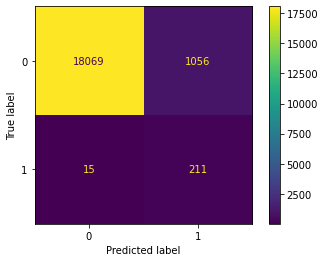

In [180]:
plot_confusion_matrix(rf, X_test_std, y_test) 

### Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
#Building the Model

lr= LogisticRegression()
lr.fit(X_train_std, y_train_ros)

LogisticRegression()

In [144]:
#Evaluate the Model
lr_eval=evaluate_model(lr, X_test_std, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision for Fraud Rate:', lr_eval['prec'])
print('Recall for Fraud Rate:', lr_eval['rec'])   #For 1
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.9264120717275593
Precision for Fraud Rate: 0.125625
Recall for Fraud Rate: 0.8893805309734514
F1 Score: 0.2201533406352683
Cohens Kappa Score: 0.20385871539604827
Area Under Curve: 0.9682188674879981
Confusion Matrix:
 [[17726  1399]
 [   25   201]]


In [145]:
#Confirmation for above function
print(classification_report(y_test, lr.predict(X_test_std)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     19125
           1       0.13      0.89      0.22       226

    accuracy                           0.93     19351
   macro avg       0.56      0.91      0.59     19351
weighted avg       0.99      0.93      0.95     19351



### Decision Tree

In [146]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_train_std, y_train_ros)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [147]:
#Evaluate the Model
dt_eval=evaluate_model(dt, X_test_std, y_test)

# Print result
print('Accuracy:', round(dt_eval['acc'],3))
print('Precision for Fraud Rate:', round(dt_eval['prec'],2))
print('Recall for Fraud Rate:', round(dt_eval['rec'],2))   #For 1
print('F1 Score:', round(dt_eval['f1'],2))
print('Cohens Kappa Score:', round(dt_eval['kappa'],2))
print('Area Under Curve:', round(dt_eval['auc'],2))
print('Confusion Matrix:\n', dt_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.806
Precision for Fraud Rate: 0.04
Recall for Fraud Rate: 0.65
F1 Score: 0.07
Cohens Kappa Score: 0.05
Area Under Curve: 0.78
Confusion Matrix:
 [[15455  3670]
 [   79   147]]


In [148]:
#Confirmation for above function
print(classification_report(y_test, dt.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     19125
           1       0.04      0.65      0.07       226

    accuracy                           0.81     19351
   macro avg       0.52      0.73      0.48     19351
weighted avg       0.98      0.81      0.88     19351



### Dense Neural Network

In [149]:

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [150]:
#Model code (Building the model)
model=Sequential()
model.add(Dense(180,input_shape=(X_train_std.shape[1],),activation='relu'))
model.add(Dense(90,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 180)               9180      
                                                                 
 dense_1 (Dense)             (None, 90)                16290     
                                                                 
 dense_2 (Dense)             (None, 30)                2730      
                                                                 
 dense_3 (Dense)             (None, 8)                 248       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 28,457
Trainable params: 28,457
Non-trainable params: 0
_________________________________________________________________


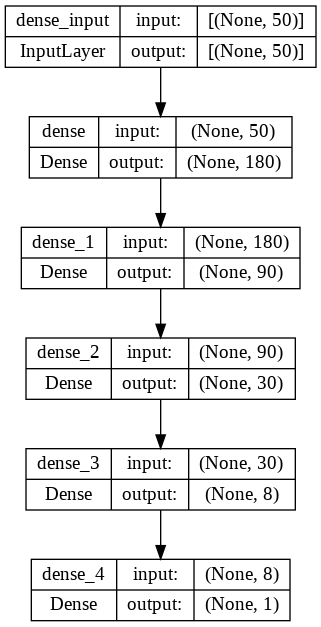

In [151]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [152]:
# compile the model (Telling how to run based on cost function optimizer and which variable to check)
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [153]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train_std,
                    y_train_ros,
                    callbacks=[es],
                    epochs=100000, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
150/150 [==============================] - 2s 4ms/step - loss: 0.3735 - accuracy: 0.8479 - val_loss: 0.1622 - val_accuracy: 0.9222
Epoch 2/100000
150/150 [==============================] - 0s 3ms/step - loss: 0.2036 - accuracy: 0.9293 - val_loss: 0.3316 - val_accuracy: 0.8862
Epoch 3/100000
150/150 [==============================] - 0s 3ms/step - loss: 0.1703 - accuracy: 0.9373 - val_loss: 0.1381 - val_accuracy: 0.9341
Epoch 4/100000
150/150 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9480 - val_loss: 0.1926 - val_accuracy: 0.9281
Epoch 5/100000
150/150 [==============================] - 0s 3ms/step - loss: 0.1455 - accuracy: 0.9446 - val_loss: 0.1486 - val_accuracy: 0.9401
Epoch 6/100000
150/150 [==============================] - 0s 3ms/step - loss: 0.1400 - accuracy: 0.9493 - val_loss: 0.1102 - val_accuracy: 0.9521
Epoch 7/100000
150/150 [==============================] - 0s 3ms/step - loss: 0.1286 - accuracy: 0.9493 - val_loss: 0.3056 -

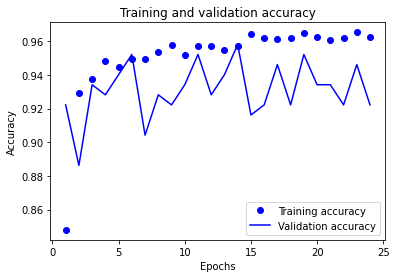

In [154]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

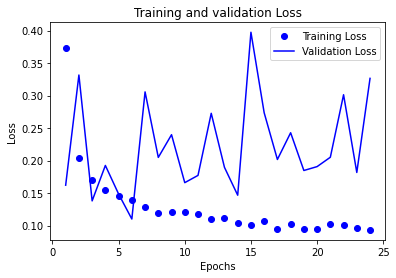

In [155]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [156]:
#Import confusion matrix related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [157]:
# check model performance
preds = np.round(model.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds) # order matters! (actual, predicted)

605/605 [==============================] - 1s 2ms/step


array([[    1, 19124],
       [    0,   226]])

### KNN

In [158]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_std, y_train_ros)

KNeighborsClassifier(n_neighbors=7)

In [181]:
#Evaluate the Model
knn_eval=evaluate_model(knn, X_test_std, y_test)

# Print result
print('Accuracy:', round(knn_eval['acc'],3))
print('Precision for Fraud Rate:', round(knn_eval['prec'],2))
print('Recall for Fraud Rate:', round(knn_eval['rec'],2))   #For 1
print('F1 Score:', round(knn_eval['f1'],2))
print('Cohens Kappa Score:', round(knn_eval['kappa'],2))
print('Area Under Curve:', round(knn_eval['auc'],2))
print('Confusion Matrix:\n', knn_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.907
Precision for Fraud Rate: 0.1
Recall for Fraud Rate: 0.85
F1 Score: 0.18
Cohens Kappa Score: 0.16
Area Under Curve: 0.95
Confusion Matrix:
 [[17362  1763]
 [   33   193]]


### XG Boost

In [160]:
# fit model no training data
xg = XGBClassifier()
xg.fit(X_train_std, y_train_ros)
# feature importance
#print(model.feature_importances_)

XGBClassifier()

In [182]:
#Evaluate the Model
xg_eval=evaluate_model(xg, X_test_std, y_test)

# Print result
print('Accuracy:', round(xg_eval['acc'],3))
print('Precision for Fraud Rate:', round(xg_eval['prec'],2))
print('Recall for Fraud Rate:', round(xg_eval['rec'],2))   #For 1
print('F1 Score:', round(xg_eval['f1'],2))
print('Cohens Kappa Score:', round(xg_eval['kappa'],2))
print('Area Under Curve:', round(xg_eval['auc'],2))
print('Confusion Matrix:\n', xg_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.905
Precision for Fraud Rate: 0.1
Recall for Fraud Rate: 0.93
F1 Score: 0.19
Cohens Kappa Score: 0.17
Area Under Curve: 0.97
Confusion Matrix:
 [[17303  1822]
 [   15   211]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


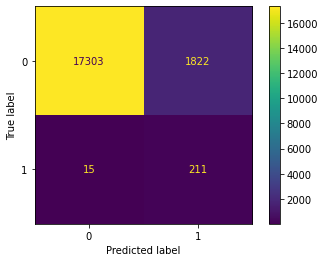

In [162]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xg, X_test_std, y_test) 

In [163]:
print("Sensitivity of above model",260/(260+147))

Sensitivity of above model 0.6388206388206388


## Model Evaluation and Comparison

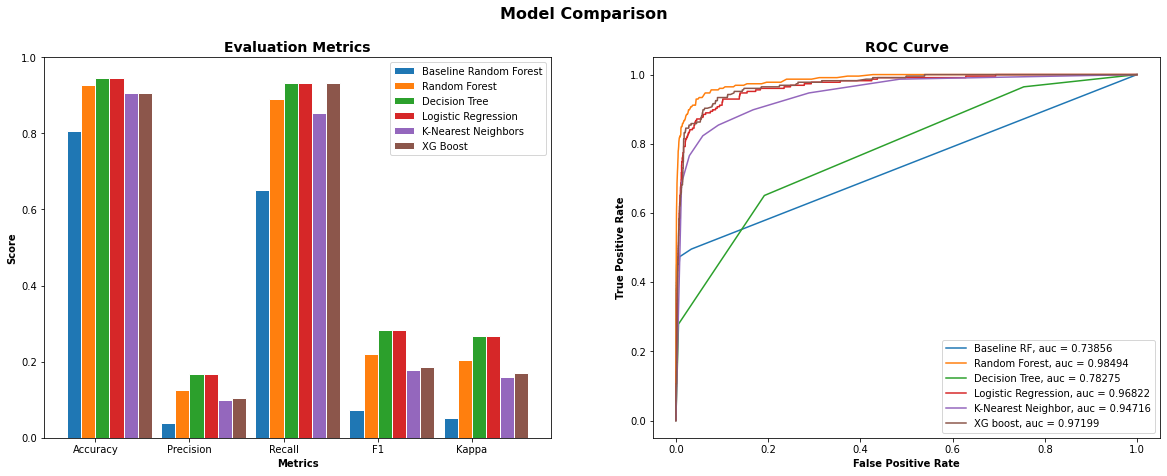

In [169]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.15
brf_score = [brf_eval['acc'], brf_eval['prec'], brf_eval['rec'], brf_eval['f1'], brf_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
xg_score = [xg_eval['acc'], xg_eval['prec'], xg_eval['rec'], xg_eval['f1'], xg_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Baseline Random Forest')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r4, rf_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r6, xg_score, width=barWidth, edgecolor='white', label='XG Boost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(brf_eval['fpr'], brf_eval['tpr'], label='Baseline RF, auc = {:0.5f}'.format(brf_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(xg_eval['fpr'], xg_eval['tpr'], label='XG boost, auc = {:0.5f}'.format(xg_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [165]:
def plot_lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

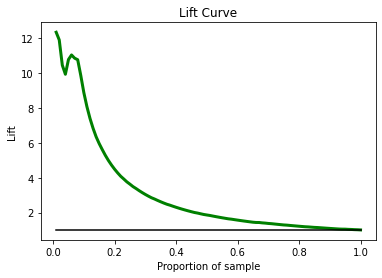

In [166]:
plot_lift_curve(y_test, lr.predict(X_test_std),)

## Recommendations:

1. With the data shared, it was possible to identify risky merchants having high fraud rates. Authorizing transactions using 3DS authentications for set of high risky merchants will help in reducing the fraud rate
2. Flow of fraud transactions is high during Wednesdays and Thursdays which is the mid-work week. Understanding fraud transaction pattern in terms of merchants and amount helps in taking better decisions for tightening the rule strategy
3. Additional authentication has to be integrated for transaction amount 3 times higher than usual transaction amount (average in that month)
4. Strategy implementation respective to location with the balance of revenue has to be implemented
5. In addition, additional information like payment mode, location of the transaction made, time of the transaction will help in better understanding of fraud pattern behaviors
